In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit
from utils import *

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

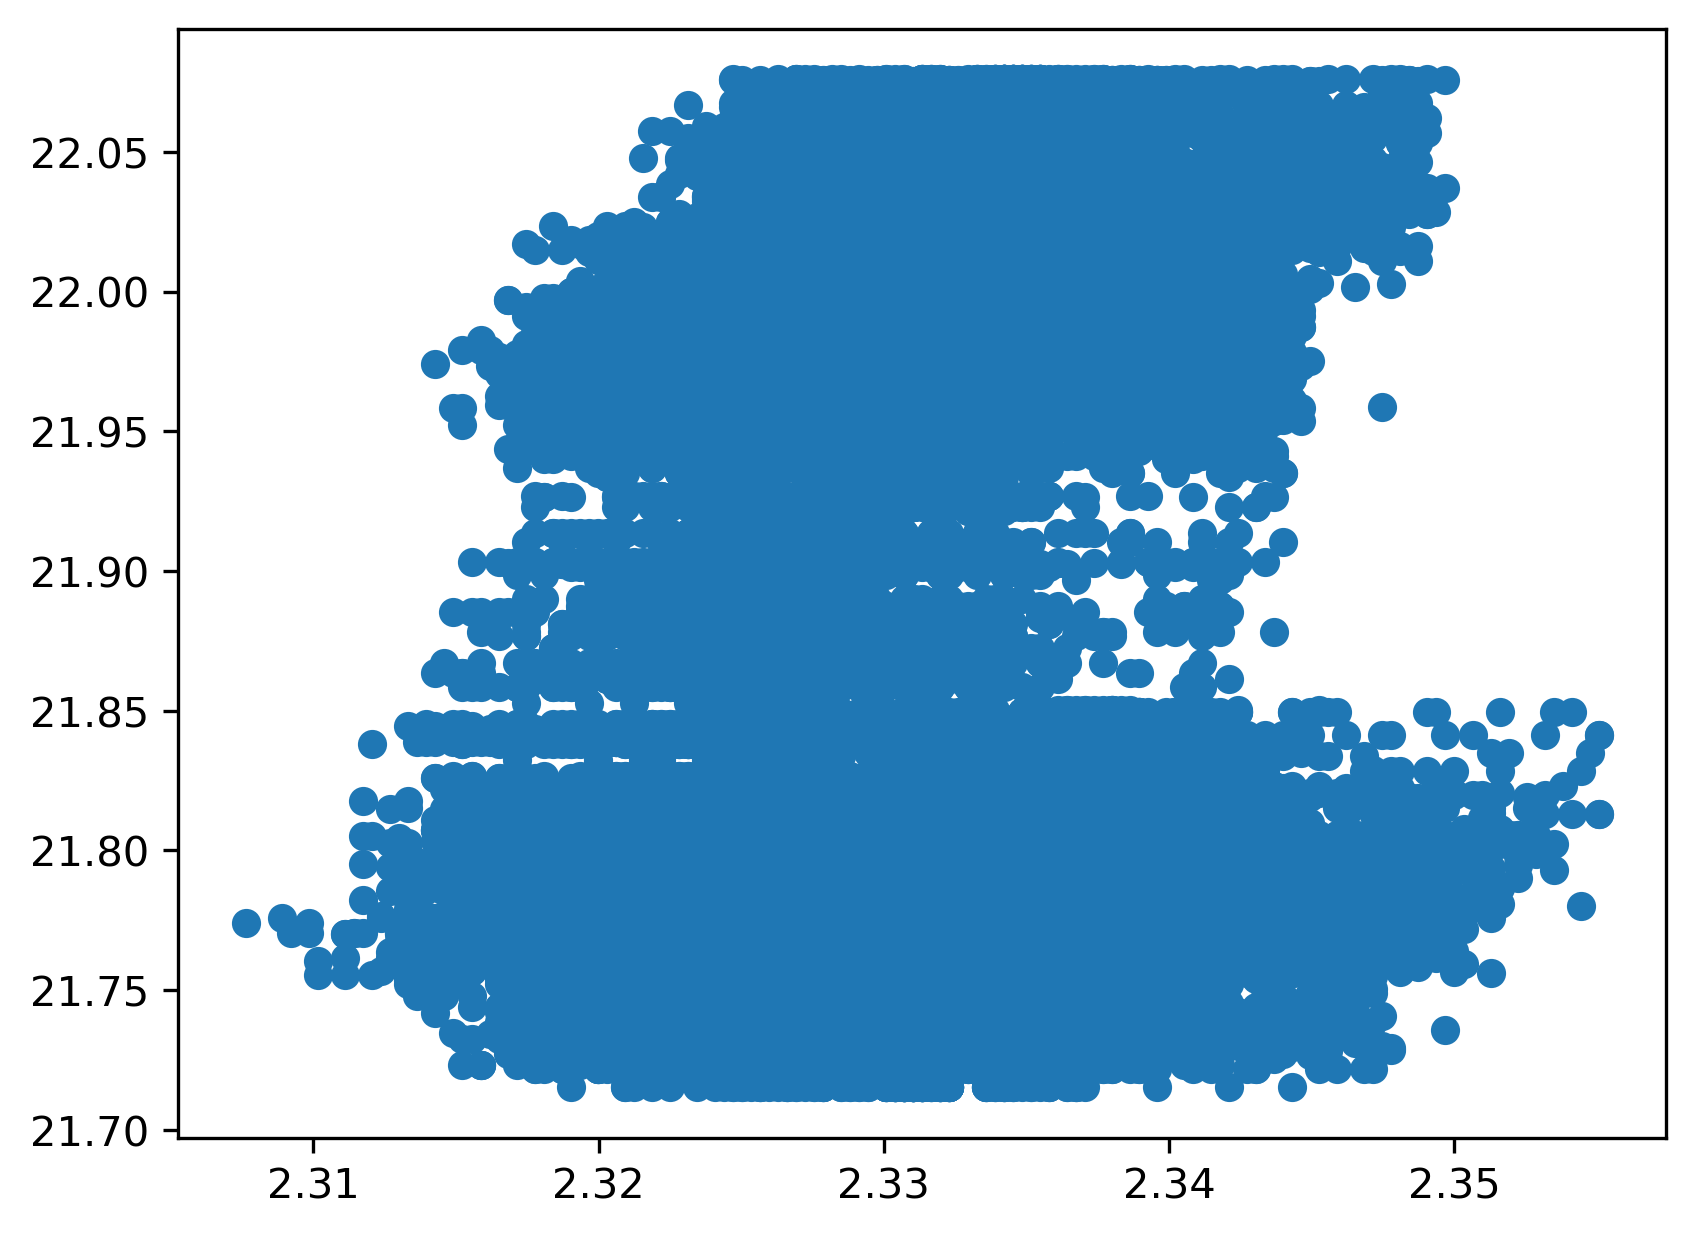

In [33]:
df = pd.read_csv('Ambient.csv')
df = convert_time_to_seconds(df, 'Time')

#plt.scatter(df['Voltage_0 (Collected)'], df['Temperature_0 (Collected)'])
plt.scatter(df['Voltage_1 (Collected)'], df['Temperature_0 (Collected)'])

#plt.plot(df['Time'], df['Voltage_0 (Collected)'])
#plt.plot(df['Time'], df['Voltage_1 (Collected)'])

In [34]:
# Calibrate Thermistor
calibration_df = df
coeff1 = get_steinhart_hart_coefficents(calibration_df)
coeff1 = [ 0.0262222,  -0.08212696,  0.09546998] # from h2a
print('Thermistor Coefficents', coeff1)

df['Temperature_1 (Thermistor)'] = get_thermistor_temperatures(df,coeff1)

Thermistor Coefficents [0.0262222, -0.08212696, 0.09546998]


In [35]:
# calibrate IC Sensor
calibration_df = df
ic_coeff = get_IC_coefficents(calibration_df) # from this data
ic_coeff = [ 23.13923163, -31.00751685] # from h2a

print('ic_coeff:', ic_coeff)

df['Temperature_2 (IC Sensor)'] = get_IC_temperatures(df, ic_coeff)

ic_coeff: [23.13923163, -31.00751685]


Text(0, 0.5, 'Temperature (C)')

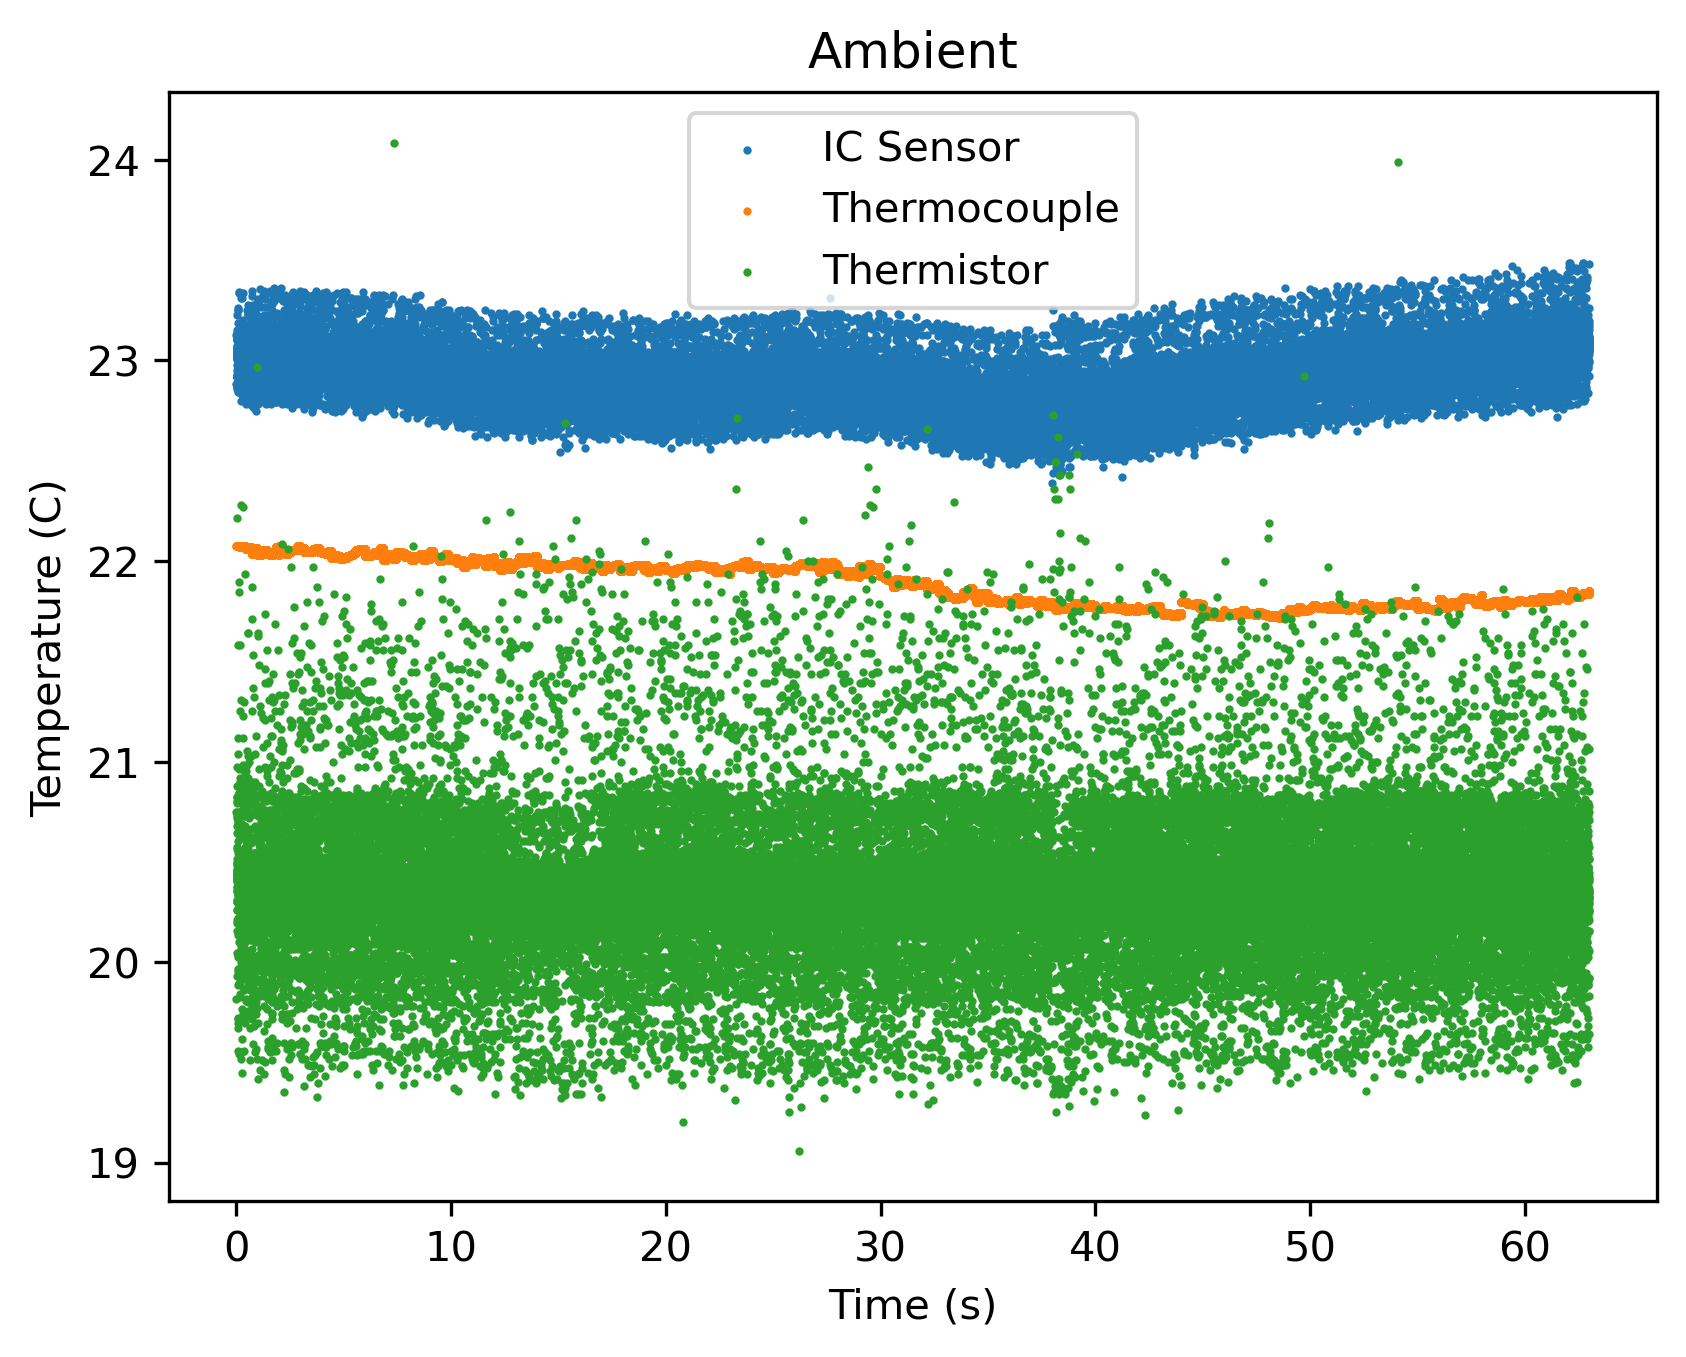

In [36]:
#plt.plot(df['Time'],df['Temperature_1 (Thermistor)'], label = 'Thermistor', alpha = 1.0)
plt.scatter(df['Time'],df['Temperature_2 (IC Sensor)'], label = 'IC Sensor', s = 1)
plt.scatter(df['Time'], df['Temperature_0 (Collected)'], label = 'Thermocouple', s=1)
plt.scatter(df['Time'],df['Temperature_1 (Thermistor)'], label = 'Thermistor', s=1)


plt.title('Ambient')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
